In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import time

# Load your dataset
df = pd.read_csv('./processed_dataset_2.0.csv')  # Load your data

# Define your target and features
X = df.drop(columns=['Literacy Rate(%)'])  # Features
y = df['Literacy Rate(%)']  # Target

# Define the split index (e.g., 80% train, 20% test)
split_index = int(0.8 * len(df))

# Apply polynomial transformation
degree = 2  # Adjust degree as needed for the model complexity
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize the polynomial features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Split the dataset into training and testing parts
X_train, X_test = X_poly_scaled[:split_index], X_poly_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train the polynomial regression model
model = LinearRegression()
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()


In [68]:
df.head()

,Year,Literacy Rate(%),Population,GDP,GDP Per Capita,Inflation Rate (%),Export,Import,Death Rate (Per 1000 people),Unemployment Rate (%),Life Expectancy (years),Urban Population,GNI (Billion USD),Poverty % Rate (National)
0,1980,26.0,83929765.0,18.14,216.0,0.82,1.00,3.24,14.768,2.1,52.48,12464409.0,18.48,58.8
1,1981,27.0,86154836.0,20.25,235.0,7.23,1.04,2.86,14.399,2.2,52.93,13613326.0,21.50,56.6
2,1982,27.8,88555336.0,18.53,209.0,2.13,0.94,2.88,14.031,2.3,53.39,14356591.0,20.91,54.3
3,1983,28.2,91045478.0,17.61,193.0,3.88,0.99,2.59,13.662,2.4,53.84,15141773.0,19.63,52.4
4,1984,28.8,93534239.0,18.92,202.0,4.80,0.64,2.54,13.213,2.5,54.41,15956941.0,19.39,51.6


In [2]:
df.head()

,Year,Population,GDP,GDP Per Capita,Export,Import,Death Rate (Per 1000 people),Unemployment Rate (%),Life Expectancy (years),Urban Population,GNI (Billion USD),Poverty % Rate (National),Literacy Rate(%)
0,1980,-1.783871,-0.773496,-0.769481,-0.858031,-0.786946,14.768,2.1,52.48,-1.401980,18.48,58.8,26.0
1,1981,-1.699109,-0.756916,-0.743174,-0.855662,-0.802445,14.399,2.2,52.93,-1.333755,21.50,56.6,27.0
2,1982,-1.607664,-0.770432,-0.779173,-0.861586,-0.801629,14.031,2.3,53.39,-1.289619,20.91,54.3,27.8
3,1983,-1.512805,-0.777661,-0.801326,-0.858624,-0.813458,13.662,2.4,53.84,-1.242993,19.63,52.4,28.2
4,1984,-1.417998,-0.767367,-0.788865,-0.879360,-0.815497,13.213,2.5,54.41,-1.194587,19.39,51.6,28.8


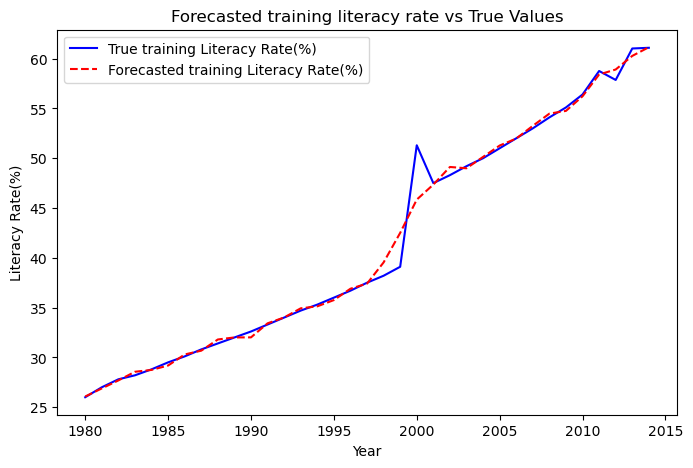

In [15]:
# Plot predictions vs true values for the test dataset
y_pred_test = model.predict(X_train)
plt.figure(figsize=(8, 5))
plt.plot(df['Year'][:split_index], y_train.values, label='True training Literacy Rate(%)', color='blue')
plt.plot(df['Year'][:split_index], y_pred_test, label='Forecasted training Literacy Rate(%)', color='red', linestyle='--')
plt.title('Forecasted training literacy rate vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()

In [22]:
# Make predictions on the test dataset
y_pred_test = model.predict(X_test)

# Plot predictions vs. true values for the test dataset
plt.figure(figsize=(10, 5))
plt.plot(df['Year'][split_index:], y_test.values, label='True Literacy Rate(%)', color='blue')
plt.plot(df['Year'][split_index:], y_pred_test, label='Forecasted Literacy Rate(%)', color='red', linestyle='--')
plt.title('Forecasted vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()

ValueError: X has 90 features, but Ridge is expecting 91 features as input.

In [7]:
# Display model performance metrics for the test set
duration = end_time - start_time
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Test Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Test R-squared (R2 Score): {r2_test:.2f}")
print(f"Training Duration: {duration:.18f} seconds")

Test Mean Squared Error (MSE): 22.56
Test Mean Absolute Error (MAE): 4.30
Test R-squared (R2 Score): -1.17
Training Duration: 0.001688957214355469 seconds


In [23]:
# Display model performance metrics for the test set
duration = end_time - start_time
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Test Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Test R-squared (R2 Score): {r2_test:.2f}")
print(f"Training Duration: {duration:.18f} seconds")

Test Mean Squared Error (MSE): 53220258.45
Test Mean Absolute Error (MAE): 4815.49
Test R-squared (R2 Score): -5113113.10
Training Duration: 0.002927064895629883 seconds


In [13]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

# Ridge with Polynomial Features
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge(alpha=1.0))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your input features

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)  # Regularization strength; adjust alpha as needed
model.fit(X_poly, y)


Ridge()

In [17]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Scaling and polynomial feature transformation
degree = 2  # Adjust degree as needed
model = make_pipeline(MinMaxScaler(), PolynomialFeatures(degree=degree), LinearRegression())

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}")


MAE: 4815.4868, MSE: 53220258.4491, R²: -5113113.1027
